In [33]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  # show all columns

In [ ]:
df = pd.read_csv("../data/detroit_open_data_portal_property_sales.csv")

df["Sale Date"] = pd.to_datetime(df["Sale Date"])
# Extract month and year
df["month"] = df["Sale Date"].dt.month
df["year"] = df["Sale Date"].dt.year

df.head(3)

c:\Users\matt\Desktop\DataProjects\detroit_property_prices\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (19,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sales ID,Parcel ID,Address,Sale Date,Sale Price,Grantor,Grantee,Liber Page,Terms of Sale,Sale Verification,Sale Instrument,sale_number,Property Transfer Percentage,Multi Parcel Sale,Property Class Code,Property Class Description,ECF Neighborhood,Neighborhood,Council District,Zip Code,Street Number,Street Prefix,Street Name,Street Type,Unit Number,Longitude,Latitude,ObjectId,x,y
0,1355623,27070821.,8050 PIEDMONT,2011-06-27,3600,HUD,"DARBY, BRENT",NaN,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN
1,1355625,27070821.,8050 PIEDMONT,2011-03-18,1,WAYNE COUNTY SHERIFF,HUD,NaN,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,0,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN
2,1357110,27070408.,18266 HUBBELL,2011-04-01,11000,HUD,"LYNCH, YVETTE",49135:156-157,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,NaN,NaN


In [27]:
# Basic statistics
print(df.shape)
print(f"Number of unique Sales: {df['Sales ID'].nunique()}")

# Get earliest and latest dates
print(f"Earliest sales date: {df['Sale Date'].min()}")
print(f"Most recent sales date: {df['Sale Date'].max()}")
print("--------------------")

# Number of NaN values per column
print(f"NaN values (% of rows) per column:\n{(df.isna().sum() / len(df) * 100).round(2)}%")
print("--------------------")


(495578, 30)
Number of unique Sales: 495578
Earliest sales date: 2011-01-01
Most recent sales date: 2025-09-12
--------------------
NaN values (% of rows) per column:
Sales ID                         0.00
Parcel ID                        0.25
Address                          0.03
Sale Date                        0.00
Sale Price                       0.00
Grantor                          0.03
Grantee                          0.34
Liber Page                      41.64
Terms of Sale                    0.00
Sale Verification                0.27
Sale Instrument                  0.00
sale_number                      0.00
Property Transfer Percentage     0.00
Multi Parcel Sale                0.00
Property Class Code              0.03
Property Class Description       1.87
ECF Neighborhood                 0.03
Neighborhood                     5.82
Council District                 5.82
Zip Code                         2.77
Street Number                    1.81
Street Prefix                   93.

## Sales Over Time

In [ ]:
# Daily
sales_by_day = df.groupby("Sale Date")["Sales ID"].count().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_day["Sale Date"], sales_by_day["Sales ID"], color="skyblue")

plt.title("Number of Sales by Day")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

KeyError: 'Sales Date'

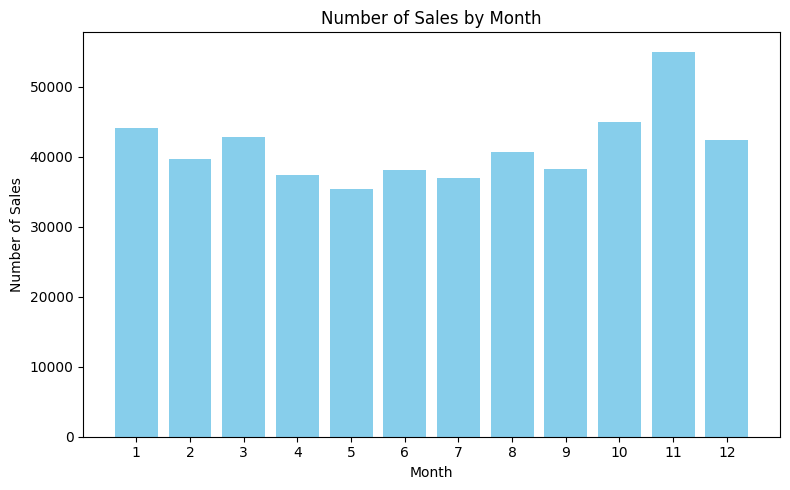

In [ ]:
# Group by month only
sales_by_month = df.groupby("month")["Sales ID"].count().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_month["month"], sales_by_month["Sales ID"], color="skyblue")

plt.title("Number of Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(range(1,13))  # show months 1–12
plt.tight_layout()
plt.show()

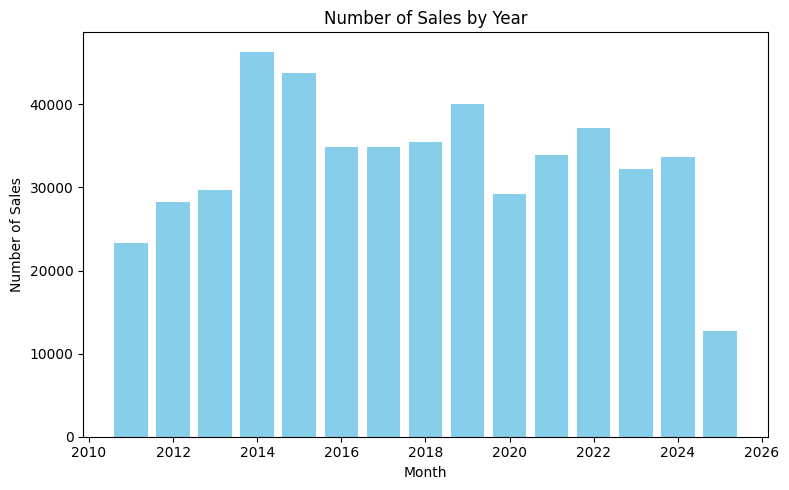

In [ ]:
# Group by year only
sales_by_year = df.groupby("year")["Sales ID"].count().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_year["year"], sales_by_year["Sales ID"], color="skyblue")

plt.title("Number of Sales by Year")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

In [42]:
# Price of Sales
pd.set_option("display.float_format", "{:.2f}".format)
percentiles = [0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
df['Sale Price'].describe(percentiles=percentiles)

count      495578.00
mean        83751.22
std       3099401.79
min             0.00
1%              0.00
5%              0.00
10%             0.00
25%             1.00
50%          1840.00
75%         30853.00
90%         99997.30
95%        200000.00
99%        890000.00
max     700000000.00
Name: Sale Price, dtype: float64

In [40]:
df.head(1)

,Sales ID,Parcel ID,Address,Sale Date,Sale Price,Grantor,Grantee,Liber Page,Terms of Sale,Sale Verification,Sale Instrument,sale_number,Property Transfer Percentage,Multi Parcel Sale,Property Class Code,Property Class Description,ECF Neighborhood,Neighborhood,Council District,Zip Code,Street Number,Street Prefix,Street Name,Street Type,Unit Number,Longitude,Latitude,ObjectId,x,y,month,year
0,1355623,27070821.,8050 PIEDMONT,2011-06-27,3600,HUD,"DARBY, BRENT",NaN,19-MULTI PARCEL ARM'S LENGTH,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,True,702.0,RETIRED REAL PROPERTY SPECIAL ACT,RET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,6,2011
